In [1]:
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import numpy as np

from algae_population import *

import matplotlib.pyplot as plt

SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 16

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})

np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})

In [2]:
# Let's solve once with water replacement
# if we replace every 1/2 hour, it means that the inhibitor is always zero
# at the end of the day
# We need to rewrite the evolution equation for it.
# 


# dilution = 10 # all the inhibitor
# tau = np.inf # every day 

solutions_age = []
# simulation with mixture of old:
for s in scenarios.items():
    solutions_time = []
    t0 = 0
    tend = 360
    replacement = 14  # days
    rep_days = np.arange(t0+replacement,tend,replacement)
    
    print(*s)
    a = scenario_to_age_distribution(s)
    I = 0.0
    y = np.hstack((a,I))
    tend = rep_days[0]

    # this means that we stop the ODE when sporulation crosses zero from above
    sporulation.terminal = True
    sporulation.direction = -1

    sol = solve_ivp(evolution, [t0, tend], y, args=(K, lamda, xi, gammai, theta, mu, dilution, tau, sigma), 
                    method=method, dense_output=True, events=sporulation)
    sol['s']=s
    solutions_time.append(sol)
    # plot_results(sol)

    for rd in rep_days[1:]:
        t0 = sol.t[-1]
        tend = rd
        y = np.hstack((sol.y[:-1,-1],I))
        sol = solve_ivp(evolution, [t0, tend], y, args=(K, lamda, xi, gammai, theta, mu, dilution, tau, sigma), method=method, dense_output=True, events=sporulation)
        sol['s']=s
        # plot_results(sol)
        solutions_time.append(sol)
    

    solutions_age.append(solutions_time)
    
        # other 20esults(sol, tend=240, K=10)

100/0 [(0, 0.2)]
90/10 [(0, 0.18000000000000002), (120, 0.020000000000000004)]
80/20 [(0, 0.16000000000000003), (120, 0.04000000000000001)]
70/30 [(0, 0.13999999999999999), (120, 0.06)]
60/40 [(0, 0.12), (120, 0.08000000000000002)]
50/50 [(0, 0.1), (120, 0.1)]
40/60 [(0, 0.08000000000000002), (120, 0.12)]
30/70 [(0, 0.06), (120, 0.13999999999999999)]
20/80 [(0, 0.04000000000000001), (120, 0.16000000000000003)]
10/90 [(0, 0.020000000000000004), (120, 0.18000000000000002)]
0/100 [(120, 0.2)]


In [3]:

# for solution in solutions_age:
#     filename = solution[0]['s'][0].replace('/','-')
#     # print(filename)
#     fig,ax = plt.subplots(1,2)
#     for s in solution:
#         # print(s)
#         ax[0].plot(s.t, s.y[:-1,:].sum(axis=0),'-o')
#         ax[1].plot(s.t, s.y[-1,:]/s.y[:-1,:].sum(axis=0),'-o')
#         ax[1].set_ylim([0,5])
#         ax[0].set_xlim([0, 120])
#         ax[1].set_xlim([0, 120])
        
#         # first axis
#         ax[0].set_xlabel('days')
#         ax[0].set_ylabel(r'Productivity kg/m$^3$')
#         # second axis
#         ax[1].set_xlabel('days')
#         ax[1].set_ylabel(r'$I$')
#         ax[0].text(10,9,solution[0]['s'][0])
    
    # fig.savefig(f'{filename}_{replacement}_days.png')
    # fig.savefig(filename+"_10days.svg")

In [4]:
import pickle
pickle.dump(solutions_age, open('figure2a.p','wb'))

solutions_age = pickle.load(open('figure2a.p','rb'))

In [6]:
# Let's solve once with water replacement
# if we replace every 1/2 hour, it means that the inhibitor is always zero
# at the end of the day
# We need to rewrite the evolution equation for it.
# 

replacements = [1, 5, 10, 15, 20, 25, 30]


data = []

for replacement in replacements:
    solutions_time = []
    # simulation with mixture of old:
    for s in scenarios.items():
        t0 = 0
        tend = 120
        rep_days = np.arange(t0+replacement,tend,replacement)
        
        print(*s)
        a = scenario_to_age_distribution(s)
        I = 0.0
        y = np.hstack((a,I))
        tend = rep_days[0]

        # this means that we stop the ODE when sporulation crosses zero from above
        sporulation.terminal = True
        sporulation.direction = -1

        sol = solve_ivp(evolution, [t0, tend], y, args=(K, lamda, xi, gammai, theta, mu, dilution, tau, sigma), 
                        method=method, dense_output=True, events=sporulation)
        sol['s'] = s

        revenue = np.sum( sol.y[:-1,:].T, axis=1).tolist()
        times = sol.t.tolist()
        # print(revenue)

        for rd in rep_days[1:]:
            t0 = sol.t[-1]
            tend = rd
            y = np.hstack((sol.y[:-1,-1],I))
            sol = solve_ivp(evolution, [t0, tend], y, 
                args=(K, lamda, xi, gammai, theta, mu, dilution, tau, sigma), 
                method=method, dense_output=True, events=sporulation)
            sol['s'] = s

            revenue.append(np.sum( sol.y[:-1,:].T, axis=1).tolist())
            times.append(sol.t.tolist())
            # print(revenue)
            # plot_results(sol)
            # solutions_time.append(sol)
            
        # biomass = sol.y[:-1,:]
        # biomass = z[:-1]
        # revenue.append(np.sum( biomass.T, axis=1))
        revenue = np.hstack(revenue)
        # print(revenue)
        # ind = np.argmax(revenue >= 9)
        # print(ind)
        times = np.hstack(times)
        # print(times[ind])
        # solutions_time.append(times[ind])
        solutions_time.append({'revenue':revenue,'times':times,'s':sol['s']})

    data.append(solutions_time)
    
        # other 20esults(sol, tend=240, K=10)

100/0 [(0, 0.2)]
90/10 [(0, 0.18000000000000002), (120, 0.020000000000000004)]
80/20 [(0, 0.16000000000000003), (120, 0.04000000000000001)]
70/30 [(0, 0.13999999999999999), (120, 0.06)]
60/40 [(0, 0.12), (120, 0.08000000000000002)]
50/50 [(0, 0.1), (120, 0.1)]
40/60 [(0, 0.08000000000000002), (120, 0.12)]
30/70 [(0, 0.06), (120, 0.13999999999999999)]
20/80 [(0, 0.04000000000000001), (120, 0.16000000000000003)]
10/90 [(0, 0.020000000000000004), (120, 0.18000000000000002)]
0/100 [(120, 0.2)]
100/0 [(0, 0.2)]
90/10 [(0, 0.18000000000000002), (120, 0.020000000000000004)]
80/20 [(0, 0.16000000000000003), (120, 0.04000000000000001)]
70/30 [(0, 0.13999999999999999), (120, 0.06)]
60/40 [(0, 0.12), (120, 0.08000000000000002)]
50/50 [(0, 0.1), (120, 0.1)]
40/60 [(0, 0.08000000000000002), (120, 0.12)]
30/70 [(0, 0.06), (120, 0.13999999999999999)]
20/80 [(0, 0.04000000000000001), (120, 0.16000000000000003)]
10/90 [(0, 0.020000000000000004), (120, 0.18000000000000002)]
0/100 [(120, 0.2)]
100/0 [(0,

In [7]:
import pickle
pickle.dump(data,open('figure2b.p','wb'))

data = pickle.load(open('figure2b.p','rb'))

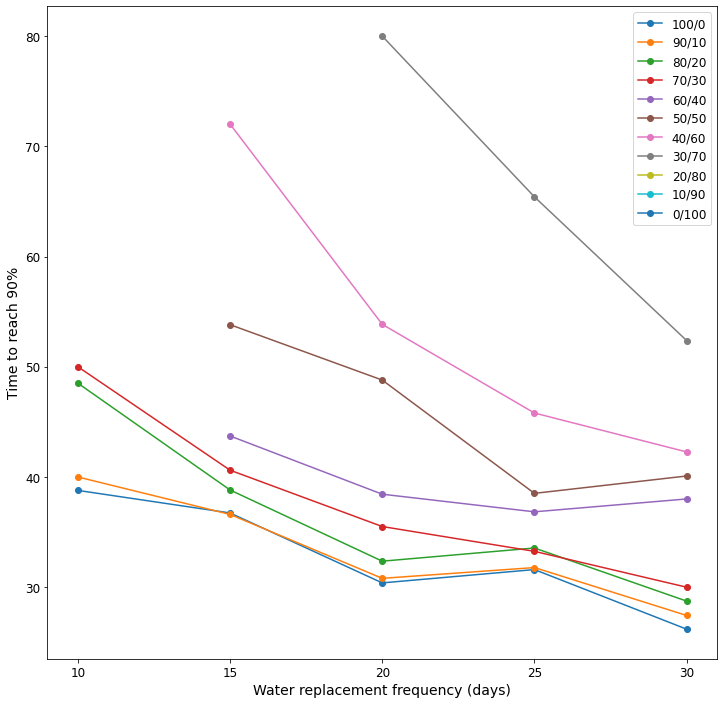

In [8]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)


markers = ['o','s','^','>','<','v','h','+','x','D','1','2']
fig, ax = plt.subplots(figsize=(12,12))

r = []
for i in range(len(replacements)):
    t = []
    for j in range(len(scenarios)):
        ind = np.argmax(data[i][j]['revenue'] >= 9)
        if ind == 0:
            t.append(np.nan)
        else:
            t.append(data[i][j]['times'][ind])

    r.append(t)


ax.plot(replacements,np.array(r),'-o')#, marker = markers[j], label=list(scenarios.items())[j][0])
        
# ax.set_yscale('log')
ax.legend(scenarios.keys(),loc='best')#,bbox_to_anchor=[1.25,.5])
# fmt = mpl.ticker.StrMethodFormatter("{x:g}")
# ax.yaxis.set_major_formatter(fmt)
ax.set_xlabel(r'Water replacement frequency (days)')
ax.set_ylabel(r'Time to reach 90%')
ax.xaxis.set_major_locator(MultipleLocator(5))
ax.xaxis.set_major_formatter('{x:.0f}')
# ax[0].yaxis.set_minor_formatter(fmt)

# ax[1].yaxis.set_major_formatter(fmt)
# ax[1].yaxis.set_minor_formatter(fmt)